## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [366]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [367]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [368]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0 = pd.read_csv("/content/bank_marketing_updated_v1.csv")

In [369]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [370]:
#read the file in inp0 without first two rows as it is of no use.
inp0 = pd.read_csv("/content/bank_marketing_updated_v1.csv",skiprows = 2)

In [371]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [372]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [373]:
print(round(100*(inp0.isnull().sum()/len(inp0.index)), 2))#Round off percentage values to 2 decimial places.

customerid    0.00
age           0.04
salary        0.00
balance       0.00
marital       0.00
jobedu        0.00
targeted      0.00
default       0.00
housing       0.00
loan          0.00
contact       0.00
day           0.00
month         0.11
duration      0.00
campaign      0.00
pdays         0.00
previous      0.00
poutcome      0.00
response      0.07
dtype: float64


In [374]:
#convert the age variable data type from float to integer.


In [375]:
#print the average age of customers.
inp0["age"].mean()

40.93565090394105

#### Dropping customer id column. 

In [376]:
#drop the customer id as it is of no use.
del inp0["customerid"]

#### Dividing "jobedu" column into job and education categories. 

In [377]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job'] = inp0.jobedu.apply(lambda x : x.split(",")[0])
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar


In [378]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education'] = inp0.jobedu.apply(lambda x : x.split(",")[1])
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [379]:
#drop the "jobedu" column from the dataframe.
del inp0["jobedu"]

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [380]:
#count the missing values in age column.
inp0["age"].isnull().sum()

20

In [381]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [382]:
#calculate the percentage of missing values in age column.
print(round(100*(inp0["age"].isnull().sum()/len(inp0["age"].index)),2))

0.04


Drop the records with age missing. 

In [383]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0.dropna()

#### handling missing values in month column

In [384]:
#count the missing values in month column in inp1.
inp1["month"].isnull().sum()

0

In [385]:
#print the percentage of each month in the data frame inp1.
print(round(100*(inp1.isnull().sum()/len(inp1.index)), 2))#Round off percentage values to 2 decimial places.

age          0.0
salary       0.0
balance      0.0
marital      0.0
targeted     0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
response     0.0
job          0.0
education    0.0
dtype: float64


In [386]:
#find the mode of month in inp1
inp1["month"].mode()[0] # we can get only the most values  in form of numbers
inp1['month'].value_counts() # we can get only the most values  in form of numbers
inp1["month"].value_counts(normalize = True) # by this we can get the percentage of most data present in the rows such as may , 2017 has 0.30 percent of the data

may, 2017    0.304383
jul, 2017    0.152579
aug, 2017    0.138104
jun, 2017    0.118086
nov, 2017    0.087828
apr, 2017    0.064907
feb, 2017    0.058633
jan, 2017    0.031079
oct, 2017    0.016337
sep, 2017    0.012769
mar, 2017    0.010552
dec, 2017    0.004744
Name: month, dtype: float64

In [387]:
# fill the missing values with mode value of month in inp1.
inp1["month"]  = inp1["month"].fillna(inp1["month"].mode()[0])

In [388]:
#let's see the null values in the month column.
inp1["month"].isnull().sum()

0

#### handling missing values in response column 

In [389]:
#count the missing values in response column in inp1.
inp1["response"].isnull().sum()

0

In [390]:
#calculate the percentage of missing values in response column. 
print(round(100*(inp1["response"].isnull().sum()/len(inp1["response"])),2))

0.0


Target variable is better of not imputed.
- Drop the records with missing values.

In [391]:
#drop the records with response missings in inp1
inp1 = inp1[-inp1.response.isnull()]

In [392]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()
inp1[inp1.month.apply(lambda x : isinstance(x,float) == True)]


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education


#### handling pdays column. 

In [393]:
#describe the pdays column of inp1.
inp1.loc[inp1["pdays"]  < 0] = np.NaN # used for replacing the values
inp1["pdays"].describe()

count    8239.000000
mean      224.545819
std       115.226203
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [394]:
#describe the pdays column with considering the -1 values.
inp1["pdays"].describe() == -1

count    False
mean     False
std      False
min      False
25%      False
50%      False
75%      False
max      False
Name: pdays, dtype: bool

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [395]:
#describe the age variable in inp1.
inp1[inp1.age.apply(lambda x : isinstance(x,float) == True)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45208,72.0,55000.0,5715.0,married,yes,no,no,no,cellular,17.0,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes,retired,secondary
45209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


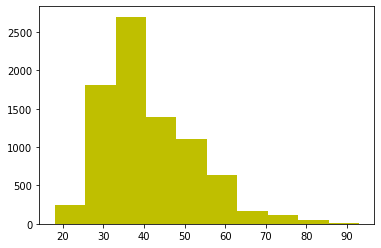

In [396]:
#plot the histogram of age variable.
plt.hist(inp1["age"],bins = 10 , color = "y")
plt.show()

In [397]:
inp1["age"].describe()

count    8239.000000
mean       40.956063
std        11.425695
min        18.000000
25%        33.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [398]:
inp1 = inp1[-inp1.age.isnull()]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f562c3d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f547f6f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f562c3640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f5ce99910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f5ce99e80>],
 'means': []}

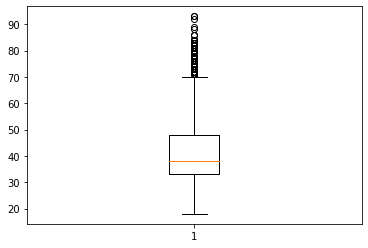

In [399]:
#plot the boxplot of age variable.
x = inp1["age"]
plt.boxplot(x)

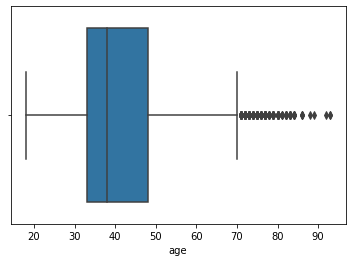

In [400]:
sns.boxplot(inp1["age"])
plt.show()

#### Salary variable 

In [401]:
#describe the salary variable of inp1.
inp1["salary"].describe()

count      8239.000000
mean      57559.898046
std       31800.211991
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f5462d760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f548adf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f5462dbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f53140220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f53140b50>],
 'means': []}

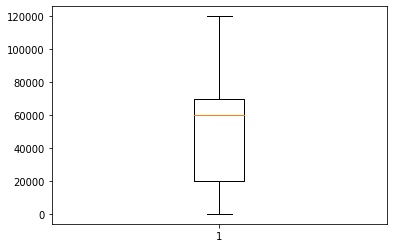

In [402]:
#plot the boxplot of salary variable.
plt.boxplot(inp1["salary"])

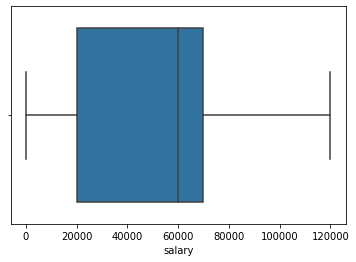

In [403]:
sns.boxplot(inp1["salary"])
plt.show()

#### Balance variable 

In [404]:
#describe the balance variable of inp1.
inp1["balance"].describe()

count     8239.000000
mean      1558.452482
std       3063.390467
min      -1884.000000
25%        168.000000
50%        602.000000
75%       1749.500000
max      81204.000000
Name: balance, dtype: float64

In [405]:
b = inp1["balance"].quantile(0.25)
a= inp1["balance"].quantile(0.75)
irq = a - b
print(irq)

upper_limit = 1749 + 1.5*1581.5
print("upper_limit",upper_limit)
lower_limit = 168.5 - 1.5*1581.5
print("upper_limit",lower_limit)


inp1[inp1["balance"]   > upper_limit]



1581.5
upper_limit 4121.25
upper_limit -2203.75


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
24189,44.0,100000.0,6203.0,married,yes,no,yes,yes,cellular,17.0,"nov, 2017",0.966666666666667 min,1.0,188.0,1.0,failure,no,management,tertiary
24326,40.0,70000.0,5766.0,divorced,yes,no,yes,yes,cellular,17.0,"nov, 2017",1.13333333333333 min,2.0,173.0,1.0,failure,no,services,secondary
24331,36.0,100000.0,5057.0,married,yes,no,yes,no,cellular,17.0,"nov, 2017",1.16666666666667 min,1.0,166.0,10.0,failure,no,management,tertiary
24346,48.0,100000.0,8106.0,single,no,no,no,no,unknown,17.0,"nov, 2017",2.08333333333333 min,1.0,111.0,3.0,failure,no,management,tertiary
24359,52.0,55000.0,5423.0,married,yes,no,no,yes,cellular,17.0,"nov, 2017",1.55 min,1.0,115.0,1.0,failure,no,retired,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45130,33.0,60000.0,5083.0,married,yes,no,no,no,cellular,27.0,"oct, 2017",2.68333333333333 min,1.0,96.0,2.0,other,no,technician,secondary
45159,60.0,70000.0,4428.0,married,yes,no,no,no,cellular,9.0,"nov, 2017",2.08333333333333 min,1.0,96.0,6.0,failure,no,services,secondary
45181,46.0,20000.0,6879.0,married,yes,no,no,no,cellular,15.0,"nov, 2017",1.23333333333333 min,2.0,118.0,3.0,failure,no,blue-collar,secondary
45185,60.0,70000.0,4256.0,married,yes,no,yes,no,cellular,16.0,"nov, 2017",3.33333333333333 min,1.0,92.0,4.0,success,yes,services,tertiary


In [406]:
inp1["balance"].quantile(0.75)

1749.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f52b47ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f52b543a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f52b47940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f52b54a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f52b54d60>],
 'means': []}

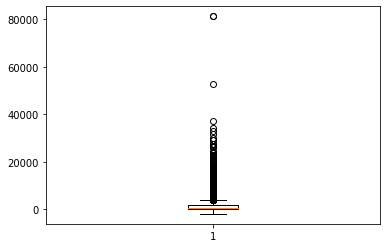

In [407]:
#plot the boxplot of balance variable.
plt.boxplot(inp1["balance"])

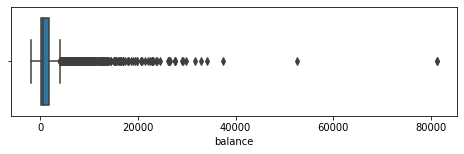

In [408]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize = [8,2])
sns.boxplot(inp1["balance"])
plt.show()

In [409]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
print(inp1["balance"].quantile(0.5))
print(inp1["balance"].quantile(0.7))
print(inp1["balance"].quantile(0.9))
print(inp1["balance"].quantile(0.95))
print(inp1["balance"].quantile(0.99))


602.0
1396.5999999999995
4014.2
6252.79999999999
12899.779999999992


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [410]:
#describe the duration variable of inp1
inp1["duration"].describe()

count                     8239
unique                     986
top       2.63333333333333 min
freq                        40
Name: duration, dtype: object

In [411]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [412]:
#describe the duration variable
inp1["duration"].describe()

count    8239.000000
mean        4.332981
std         3.919921
min         0.016667
25%         1.883333
50%         3.216667
75%         5.400000
max        36.983333
Name: duration, dtype: float64

In [413]:
inp1["month"] = inp1.month.apply(lambda x : x.split(","),[1])

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [414]:
#calculate the percentage of each marital status category. 
inp1["marital"].value_counts(normalize = True)

married     0.575191
single      0.312295
divorced    0.112514
Name: marital, dtype: float64

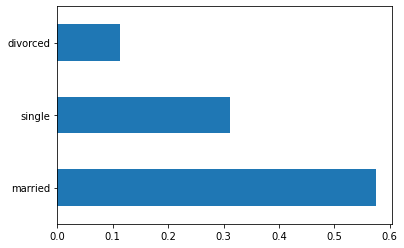

In [415]:
#plot the bar graph of percentage marital status categories
inp1["marital"].value_counts(normalize = True).plot.barh()
plt.show()

#### Job  

In [416]:
#calculate the percentage of each job status category.
inp1["job"].value_counts(normalize = True)

management       0.221143
blue-collar      0.196140
technician       0.162641
admin.           0.131812
services         0.085569
retired          0.058988
student          0.034470
self-employed    0.033742
entrepreneur     0.027309
unemployed       0.025853
housemaid        0.018327
unknown          0.004005
Name: job, dtype: float64

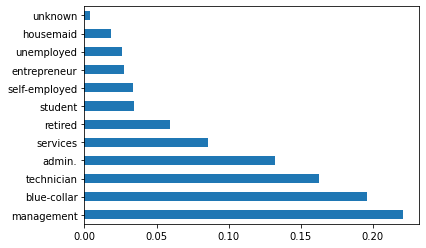

In [417]:
#plot the bar graph of percentage job categories
inp1["job"].value_counts(normalize = True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

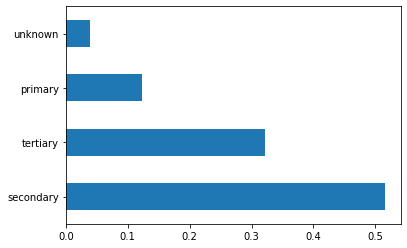

In [418]:
#calculate the percentage of each education category.
inp1["education"].value_counts(normalize = True).plot.barh()
plt.show()

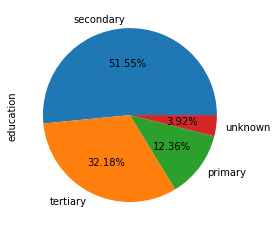

In [419]:
inp1["education"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')

#### poutcome 

In [420]:
#calculate the percentage of each poutcome category.
inp1["poutcome"].value_counts(normalize = True)


failure    0.593519
other      0.223207
success    0.182668
unknown    0.000607
Name: poutcome, dtype: float64

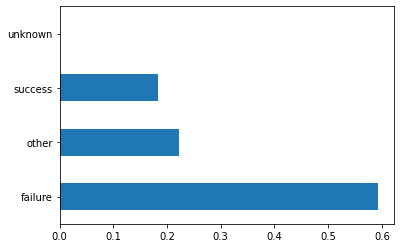

In [421]:
inp1["poutcome"].value_counts(normalize = True).plot.barh()
plt.show()


#### Response the target variable 

In [422]:
#calculate the percentage of each response category.
inp1["response"].value_counts(normalize = True)

no     0.769389
yes    0.230611
Name: response, dtype: float64

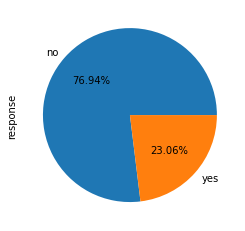

In [423]:
#plot the pie chart of response categories
inp1["response"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

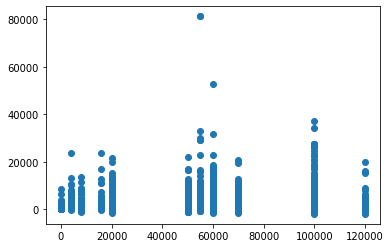

In [424]:
#plot the scatter plot of balance and salary variable in inp1
x = inp1["salary"]
y = inp1["balance"]
plt.scatter(x,y)

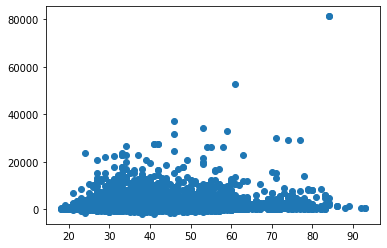

In [425]:
#plot the scatter plot of balance and age variable in inp1
x = inp1["age"]
y = inp1["balance"]
plt.scatter(x,y)

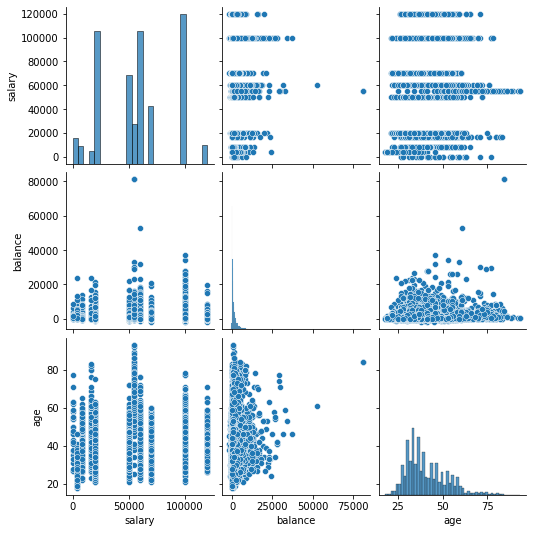

In [426]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data = inp1, vars = ["salary","balance","age"])
plt.show()

#### Correlation heat map 

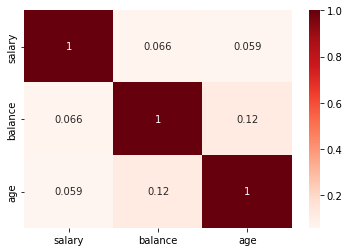

In [427]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[["salary","balance","age"]].corr(),annot = True , cmap = "Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [428]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
a = inp1.groupby("response")

In [429]:
inp1.groupby("response")["salary"].mean() # teq 1

response
no     56919.230162
yes    59697.368421
Name: salary, dtype: float64

In [430]:
b = a.get_group("no")
b["salary"].mean()

56919.230162486194

In [431]:
c = a.get_group("yes")
c["salary"].mean()

59697.36842105263

In [432]:
#groupby the response to find the median of the salary with response no & yes seperatly.
b = a.get_group("no")
b["salary"].median()

60000.0

In [433]:
b = a.get_group("yes")
b["salary"].median()

60000.0

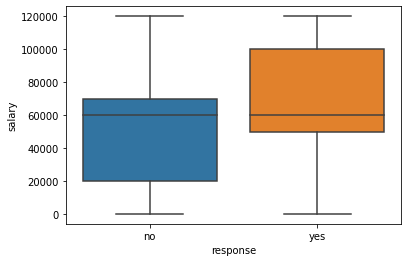

In [434]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data = inp1,x ="response" ,y = "salary")

#### Balance vs response 

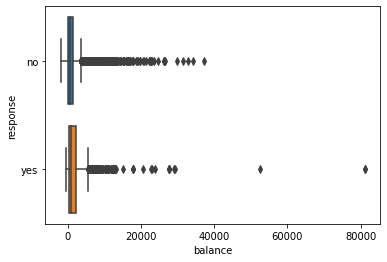

In [435]:
#plot the box plot of balance for yes & no responses
sns.boxplot(data = inp1,x ="balance" ,y = "response")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f5cdfe550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f54805fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f5499c550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f5636aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f5636a250>],
 'means': []}

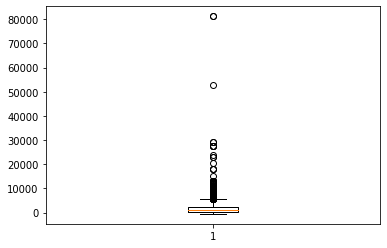

In [436]:
b = a.get_group("yes")
u = b["balance"]
plt.boxplot(u)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f5493eca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f5493ea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f5283c790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f5214f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f5214f880>],
 'means': []}

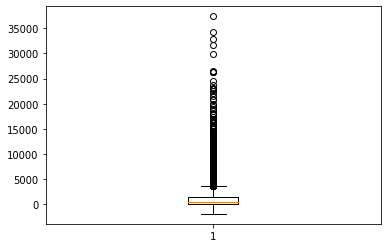

In [437]:
b = a.get_group("no")
u = b["balance"]
plt.boxplot(u)

In [438]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
b = a.get_group("yes")
b.mean()

age            42.458947
salary      59697.368421
balance      1989.458421
day            14.716316
duration        6.789246
campaign        1.789474
pdays         192.526842
previous        3.252105
dtype: float64

In [439]:
b = a.get_group("no")
b.mean()

age            40.505600
salary      56919.230162
balance      1429.266288
day            14.159489
duration        3.596761
campaign        2.137403
pdays         234.142925
previous        3.155545
dtype: float64

In [440]:
#groupby the response to find the median of the balance with response no & yes seperatly.
b = a.get_group("yes")
b.median()

age            38.000000
salary      60000.000000
balance       886.000000
day            14.000000
duration        5.191667
campaign        1.000000
pdays         181.000000
previous        2.000000
dtype: float64

In [441]:
b = a.get_group("no")
b.median()

age            38.0
salary      60000.0
balance       543.0
day            14.0
duration        2.7
campaign        2.0
pdays         232.0
previous        2.0
dtype: float64

##### 75th percentile 

In [442]:
#function to find the 75th percentile.


In [461]:
#calculate the mean, median and 75th percentile of balance with response
a = inp1.groupby("response")
a["balance"].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,6339.0,1429.266288,2663.86143,-1884.0,141.0,543.0,1554.0,37378.0
yes,1900.0,1989.458421,4096.91518,-556.0,265.0,886.0,2355.5,81204.0


In [462]:
a = inp1.groupby("response")
a["balance"].mean()

response
no     1429.266288
yes    1989.458421
Name: balance, dtype: float64

In [463]:
a = inp1.groupby("response")
a["balance"].median()

response
no     543.0
yes    886.0
Name: balance, dtype: float64

In [464]:
a = inp1.groupby("response")
a["balance"].quantile(0.75)

response
no     1554.0
yes    2355.5
Name: balance, dtype: float64

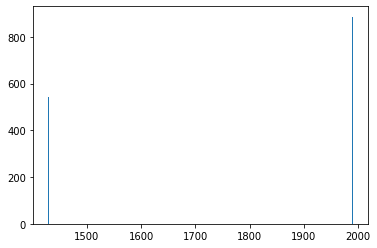

In [444]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby()

#### Education vs salary 

In [445]:
#groupby the education to find the mean of the salary education category.
a = inp1.groupby("education")["salary"]
a.mean()

education
primary      35623.772102
secondary    48555.450907
tertiary     81350.811015
unknown      49829.721362
Name: salary, dtype: float64

In [446]:
#groupby the education to find the median of the salary for each education category.
a = inp1.groupby("education")["salary"]
a.median()

education
primary       20000.0
secondary     50000.0
tertiary     100000.0
unknown       55000.0
Name: salary, dtype: float64

#### Job vs salary

In [447]:
#groupby the job to find the mean of the salary for each job category.
a = inp1.groupby("job")["salary"]
a.mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [468]:
inp1["response"].value_counts()

no     6339
yes    1900
Name: response, dtype: int64

### Segment- 5, Categorical categorical variable 

In [469]:
inp1["response_flag"] = np.where(inp1["response"] == "yes",1,0)
inp1["response_flag"].value_counts()

0    6339
1    1900
Name: response_flag, dtype: int64

#### Education vs response rate

In [470]:
#calculate the mean of response_flag with different education categories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.169941
secondary    0.200848
tertiary     0.293474
unknown      0.297214
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [472]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital')["response_flag"].mean()


marital
divorced    0.196332
married     0.221355
single      0.260008
Name: response_flag, dtype: float64

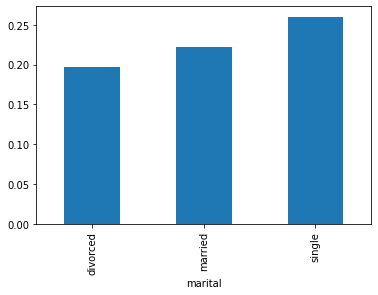

In [474]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital')["response_flag"].mean().plot.bar()


#### Loans vs response rate 

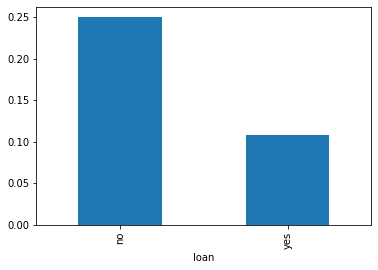

In [478]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby("loan")["response_flag"].mean().plot.bar()


#### Housing loans vs response rate 

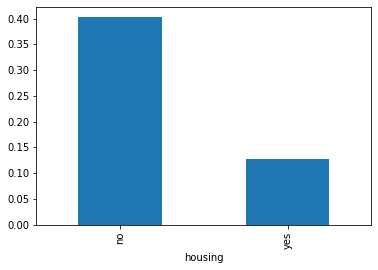

In [479]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby("housing")["response_flag"].mean().plot.bar()


#### Age vs response 

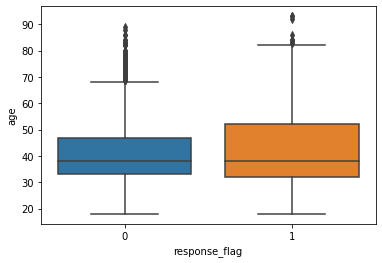

In [484]:
#plot the boxplot of age with response_flag
sns.boxplot(data = inp1 , x = "response_flag" , y = "age")
plt.show()

##### making buckets from age columns 

In [486]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
x = inp1["age"]
pd.cut(x,bins = 6)

24060    (30.5, 43.0]
24062    (30.5, 43.0]
24064    (30.5, 43.0]
24072    (30.5, 43.0]
24077    (30.5, 43.0]
             ...     
45199    (30.5, 43.0]
45201    (43.0, 55.5]
45204    (68.0, 80.5]
45208    (68.0, 80.5]
45210    (30.5, 43.0]
Name: age, Length: 8239, dtype: category
Categories (6, interval[float64, right]): [(17.925, 30.5] < (30.5, 43.0] < (43.0, 55.5] <
                                           (55.5, 68.0] < (68.0, 80.5] < (80.5, 93.0]]

In [456]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.


In [457]:
#plot the bar graph of job categories with response_flag mean value.


### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [458]:
#create heat map of education vs marital vs response_flag


#### Job vs marital vs response 

In [459]:
#create the heat map of Job vs marital vs response_flag.


#### Education vs poutcome vs response

In [460]:
#create the heat map of education vs poutcome vs response_flag.
